In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("executions/orders10Mv2.csv")
df

,id,order_id,trader,event,kind,side,price,qty,instrument,sequence,time,execution_time,status
0,5aa8a5fd-0b76-4280-858c-f7d8321a736b,f7a95d4c-c70d-426f-bec8-eb303b6f5738,838245,New,Limit,Buy,103.28,6494.0,AAPL,0,2022-10-14T18:44:45.765116100Z,34600,Placed
1,5b497326-c2bc-48db-8de8-17809d5ffb1c,1fe8376f-e832-454c-a330-7f01f8d54093,514193,New,Limit,Buy,101.87,9761.0,AAPL,1,2022-10-14T18:44:45.765132600Z,35600,Placed
2,af9d3aaf-d696-4138-866e-f187efea79a7,c2d2a06f-663d-445b-b2aa-f9f9e5964b9f,162721,New,Limit,Sell,96.30,8301.0,AAPL,2,2022-10-14T18:44:45.765133800Z,1100,Filled
3,76e7b7aa-88e1-4395-8d2a-ece38411fc67,c6e1d042-7f1a-4a9a-ac60-9ff26bc07e9b,735690,New,Limit,Sell,100.33,3931.0,AAPL,3,2022-10-14T18:44:45.765134800Z,600,Filled
4,b63b769d-9017-4d53-98fe-e7fabd12ea2e,f10a9af5-afdd-46d7-b5e8-82f2269aa63f,414947,New,Limit,Buy,100.06,5190.0,AAPL,4,2022-10-14T18:44:45.765135500Z,19500,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,a85645ea-9359-409c-99d8-d1ad7a4b4509,8f7aebda-2b9b-4207-8838-5b457cf45fd5,303746,New,Market,Buy,100.00,37.0,AAPL,9999995,2022-10-14T18:45:04.481338700Z,1300,Filled
9999996,9d981b83-773e-4849-94f5-821f79cc4827,fffef92a-845d-49de-b325-c3eb9f343bf1,496265,New,Limit,Sell,97.39,2432.0,AAPL,9999996,2022-10-14T18:45:04.481339700Z,2000,Filled
9999997,2f1024c4-181d-4f6c-b108-ce867dd73b60,046dcb84-3304-4e7c-8596-f6f50f41b7f7,587087,New,Limit,Buy,98.58,2469.0,AAPL,9999997,2022-10-14T18:45:04.481340200Z,1600,Placed
9999998,71d93e86-8958-40c5-966a-3df4ff1cc184,0da071fb-d1dd-4391-befd-a58469c7941e,871628,New,Limit,Sell,99.96,1364.0,AAPL,9999998,2022-10-14T18:45:04.481340700Z,2100,Placed


# Basic stats

## Order requests

In [3]:
total_prices_requested = len(set(df.price.to_list()))
print("total prices(levels) requested:", total_prices_requested)

total_volume_requested = df.qty.sum()
print("total volume requested:", total_volume_requested)

total prices(levels) requested: 1798
total volume requested: 39405630660.0


## Orderbook events/executions

Total volume per orderbook status (mlns)

status
Canceled              61.770061
Filled             14547.867162
PartiallyFilled     2926.756868
Placed             21869.232047
Unfilled               0.004522
Name: qty, dtype: float64

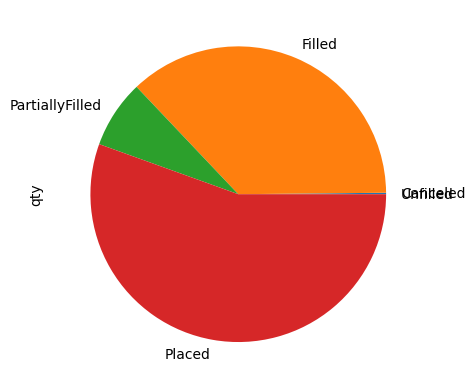

In [4]:
df.groupby("status").qty.sum().plot(kind="pie")
df.groupby("status").qty.sum()/1e6

Total placed levels

In [5]:
len(set(df[df.status=="Placed"].price.to_list()))

1739

# Transactions per second (TPS)

656749 TPS


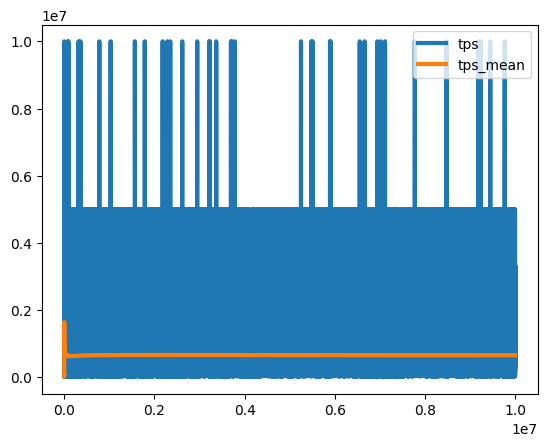

In [6]:
df['tps'] = 1e9 / df.execution_time
df['tps_mean'] = df.tps.expanding().mean()
df[["tps","tps_mean"]].plot(legend=True, linewidth=3)
print(f"{int(df['tps_mean'].iloc[-1])} TPS")

# Distribution of quantities per order kind (Limit, Market)

<AxesSubplot: >

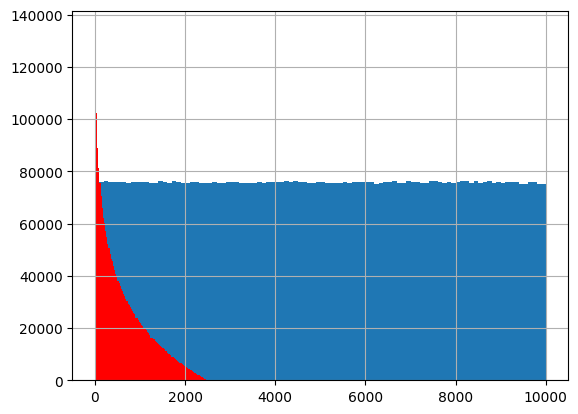

In [7]:
df[df["kind"]=="Limit"].qty.hist(bins=100)
df[df["kind"]=="Market"].qty.hist(bins=100, color="red")

# Average execution time per order request 

<AxesSubplot: xlabel='event'>

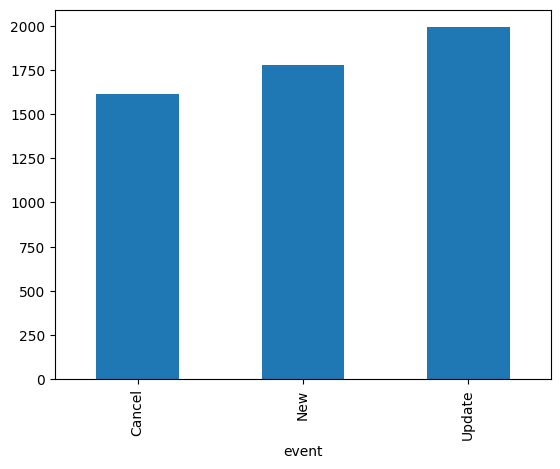

In [8]:
df.groupby(["event"]).execution_time.mean().plot(kind="bar")

# Average execution time per order status

<AxesSubplot: xlabel='status'>

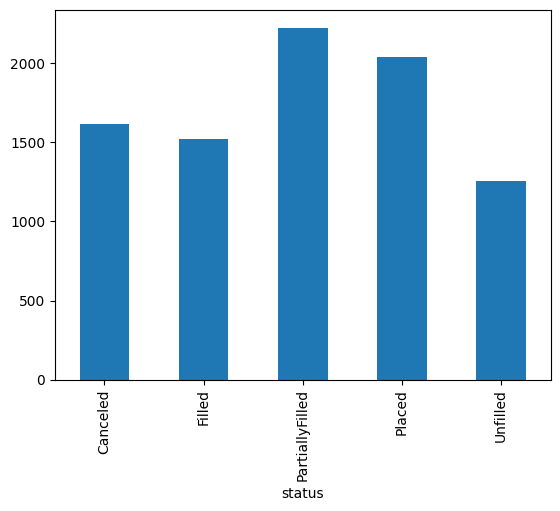

In [9]:
df.groupby(["status"]).execution_time.mean().plot(kind="bar")

# Total occurrences per order status

status
Canceled             12298
Filled             5158652
PartiallyFilled     446210
Placed             4374638
Unfilled              8202
Name: id, dtype: int64

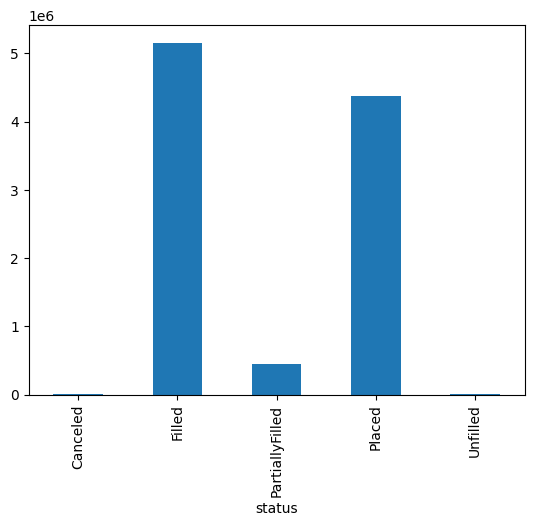

In [10]:
df.groupby(["status"]).id.count().plot(kind="bar")
df.groupby(["status"]).id.count()

# How many orders for each kind (Limit, Market)

kind
Limit     7580626
Market    2419374
Name: id, dtype: int64

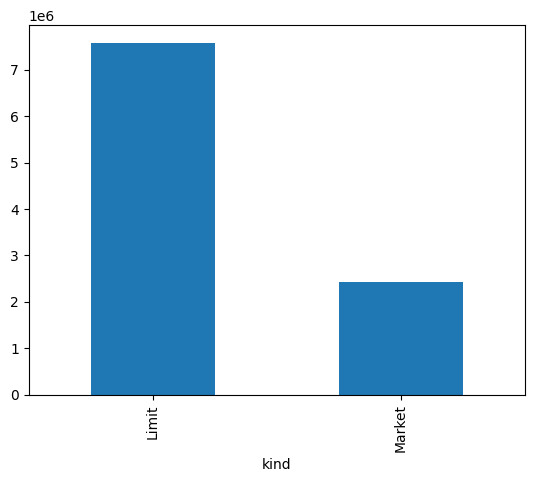

In [11]:
df.groupby(["kind"]).id.count().plot(kind="bar")
df.groupby(["kind"]).id.count()

# Execution times per order

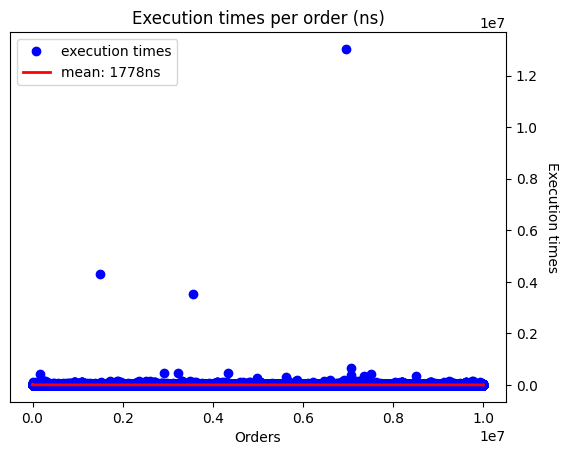

In [12]:
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times', rotation=270, labelpad=15)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title(f'Execution times per order (ns)')

mean = df['execution_time'].expanding().mean()
ax.plot(df["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"mean: {int(mean.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

# Execution times per filtered orders (<2std)

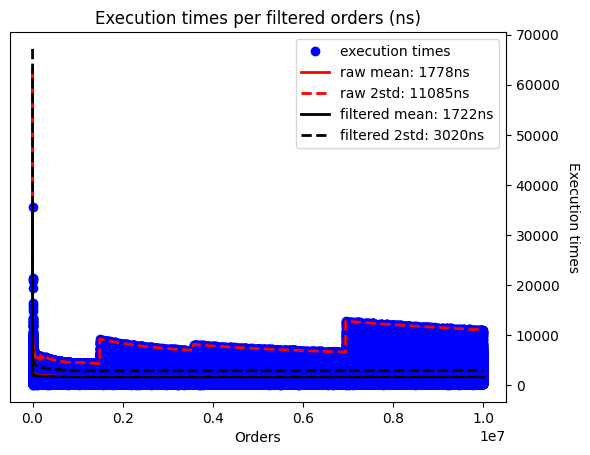

In [15]:
fig, ax = plt.subplots()
plt.xlabel(f'Orders')
plt.ylabel(f'Execution times', rotation=270, labelpad=15)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.title(f'Execution times per filtered orders (ns)')
std = 2
mean = df['execution_time'].expanding().mean()
outlier_filter = df['execution_time'].expanding().mean() + df['execution_time'].expanding().std()*std
filtered = df[df["execution_time"] < outlier_filter]["execution_time"]
mean_filtered = filtered.expanding().mean()
outlier_filter_filtered = filtered.expanding().mean() + filtered.expanding().std()*std
ax.plot(df[df["execution_time"] < outlier_filter]["execution_time"], 'o', c='b', label="execution times")
ax.plot(mean, 'r', linewidth=2, label=f"raw mean: {int(mean.iloc[-1])}ns")
ax.plot(outlier_filter, 'r--', linewidth=2, label=f"raw 2std: {int(outlier_filter.iloc[-1])}ns")
ax.plot(mean_filtered, 'k', linewidth=2, label=f"filtered mean: {int(mean_filtered.iloc[-1])}ns")
ax.plot(outlier_filter_filtered, 'k--', linewidth=2, label=f"filtered 2std: {int(outlier_filter_filtered.iloc[-1])}ns")
ax.legend()
fig.patch.set_facecolor('xkcd:white')
# fig.set_size_inches(20, 10)

## Number of outliers

In [16]:
outliers = df[df["execution_time"] > outlier_filter].count().id
print(f"{round(outliers/len(df)*100,2)}%")

0.45%
